In [49]:
import sys 
sys.path.append('..')
from Data import gener_dt
from Tools import MI, Imputers, Metrics, HG_tools

import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline
from importlib import reload

In [32]:
reload(Imputers)
reload(MI)
reload(gener_dt)
reload(Metrics)
reload(HG_tools)

<module 'Tools.HG_tools' from '/Users/ash/Desktop/MICE/PY/fin_res_csv/../Tools/HG_tools.py'>

In [81]:
distrs = ['gamma1', 'gamma2', 'norm_mix1', 'norm_mix2']
# distrs = ['norm', 'unif', 'lognorm1', 'lognorm2', 'gamma1', 'gamma2', 'norm_mix1', 'norm_mix2']
#distrs = ['unif', 'gamma1', 'norm_mix1']
scens = ['lr_quadr', 'logr_quadr', 'lr_inter', 'logr_inter']
#scens = ['lr_quadr', 'lr_inter']

2023-03-20 15:06:33,437 [WARNING] Binary variables (at indices [1]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-03-20 15:06:33,441 [WARNING] Candidates for pattern 0 all have almost the same weighted sum scores. It is possible this is due to the use of binary variables in amputation. This creates problems when using the sigmoid function for the score_to_probability_func. Currently our solution is as follows: if there is just one candidate with a sum score 0, we will ampute it. If there is one candidate with a nonzero sum score, or multiple candidates with the same score, we evenly apply as if MCAR.
2023-03-20 15:06:33,452 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-03-20 15:06:33,466 [WARNING] Indicated weights for incomp

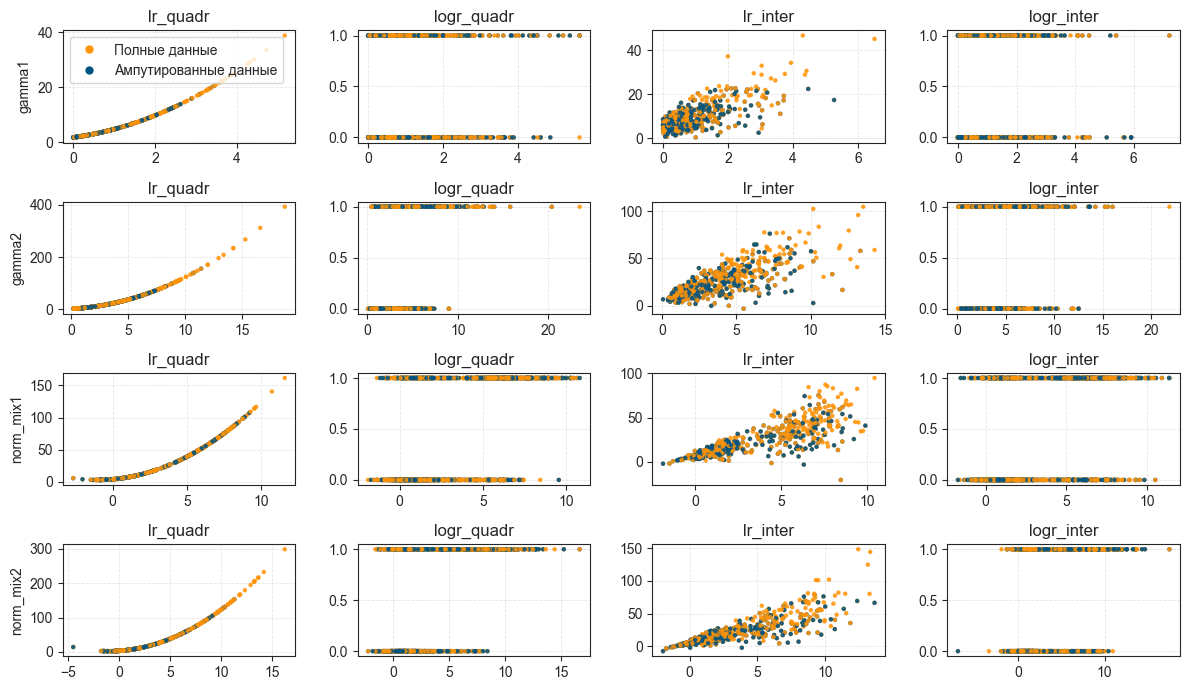

In [82]:
def full_amp(distr, scenar):
    df = gener_dt.gener(X_distr = distr, scenar = scenar)
    df_miss_MAR = HG_tools.amp(df)

    df['meth'] = 'full'
    df_miss_MAR['meth'] = 'amputed'
    
    df_merged = pd.concat([df, df_miss_MAR], ignore_index = True)
    return df_merged.sample(frac=1)


colors = {'amputed':'xkcd:deep sea blue', 'full':'xkcd:tangerine'}
i = 0
j = 0

fig, axs = plt.subplots( nrows = len(distrs), ncols = len(scens), figsize = (12, 7))#, sharex = True, sharey = True )
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
        
for di in distrs:
    for sc in scens:        

        df_fin = full_amp(di, sc)
        
        axs[i, j].scatter( df_fin['X'], df_fin['Y'], s = 5, c = df_fin['meth'].map(colors), alpha = 0.8 )
        axs[i, j].set_title(sc)
        axs[i, j].grid(alpha = 0.5, linestyle = '--', linewidth = 0.6)
        axs[i, j].yaxis.get_data_interval()
        # axs[0, 0].set_ylabel("X2")
        j += 1

    j = 0
    axs[i, j].set_ylabel(di)
    i += 1

    
orange_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Полные данные',
                    markerfacecolor = 'xkcd:tangerine', markersize = 7)
blue_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Ампутированные данные',
                        markerfacecolor = 'xkcd:deep sea blue', markersize = 7)
axs[0, 0].legend(handles = [orange_circle, blue_circle], loc=2)


plt.tight_layout()
#plt.show()
plt.savefig('/Users/ash/Desktop/MICE/PY/Data/scen-s_all2.png')

In [4]:
def plt_bef_aft(df_bef, df_aft, method, m):
    fig, ax = plt.subplots(figsize = (5, 5))
    plt.scatter(df_bef['X'], df_bef['Y'], s = 6, c = 'xkcd:tangerine')
#     plt.scatter(df_aft[:, 0], df_aft[:, 2], s = 8, c = 'xkcd:deep sea blue')
    plt.scatter(df_aft['X'], df_aft['Y'], s = 6, c = 'xkcd:deep sea blue')
    plt.title(method + ', m = ' + str(m))
    plt.xlim(-1, 8)
    plt.ylim(-1, 60)
    plt.show()

# Generated df

In [3]:
df = gener_dt.gener(X_distr = 'norm', scenar = 'logr_quadr')
df

X  Y        X^2
0    3.331406  0  11.098267
1    4.282317  1  18.338238
2    4.129170  1  17.050045
3    5.155523  1  26.579422
4    5.808874  1  33.743022
..        ... ..        ...
995  3.040435  0   9.244244
996  3.706270  0  13.736438
997  4.459002  1  19.882696
998  4.290698  1  18.410090
999  4.485808  0  20.122470

[1000 rows x 3 columns]

In [6]:
MI.coefs_vars(df, 'log_regr')

Optimization terminated successfully.
         Current function value: 0.674189
         Iterations 5


(const    0.077363
 X       -0.415068
 X^2      0.099527
 dtype: float64,
 const    0.795105
 X        0.408668
 X^2      0.051385
 dtype: float64)

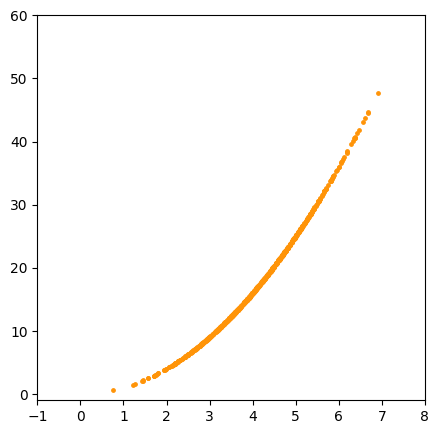

In [7]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['X^2'], s = 6, c = 'xkcd:tangerine')

plt.xlim(-1, 8)
plt.ylim(-1, 60)
plt.show()

# Ampute

In [9]:
df_miss_MAR = HG_tools.amp(df)

2023-03-12 12:52:52,985 [WARNING] Binary variables (at indices [1]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-03-12 12:52:52,991 [WARNING] Candidates for pattern 0 all have almost the same weighted sum scores. It is possible this is due to the use of binary variables in amputation. This creates problems when using the sigmoid function for the score_to_probability_func. Currently our solution is as follows: if there is just one candidate with a sum score 0, we will ampute it. If there is one candidate with a nonzero sum score, or multiple candidates with the same score, we evenly apply as if MCAR.


In [11]:
df_miss_MAR

X  Y        X^2
0    3.331406  0  11.098267
1    4.282317  1  18.338238
2         NaN  1        NaN
3    5.155523  1  26.579422
4         NaN  1        NaN
..        ... ..        ...
995       NaN  0        NaN
996       NaN  0        NaN
997  4.459002  1  19.882696
998  4.290698  1  18.410090
999  4.485808  0  20.122470

[1000 rows x 3 columns]

In [12]:
MI.coefs_vars(df, 'log_regr')

Optimization terminated successfully.
         Current function value: 0.674189
         Iterations 5


(const    0.077363
 X       -0.415068
 X^2      0.099527
 dtype: float64,
 const    0.795105
 X        0.408668
 X^2      0.051385
 dtype: float64)

In [14]:
reload(gener_dt)
reload(MI)

<module 'Tools.MI' from '/Users/ash/Desktop/MICE/PY/fin_res_csv/../Tools/MI.py'>

In [15]:
df_imp = Imputers.impute(df_miss_MAR, 'mice_rf')

In [27]:
import math 
np.sqrt(9)

3.0

In [16]:
mice_coef, mice_vars = MI.pooling(imp_mice = df_imp, regr_type = 'log_regr')

Optimization terminated successfully.
         Current function value: 0.680599
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680527
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680566
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680529
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680542
         Iterations 5


In [17]:
mice_coef

array([ 1.0529904 , -0.85070257,  0.14637034])

In [ ]:
coefs_vars_logist(df_imp)

In [22]:
reload(Metrics)

<module 'Tools.Metrics' from '/Users/ash/Desktop/MICE/PY/fin_res_csv/../Tools/Metrics.py'>

In [23]:
Metrics.metr(df, df_miss_MAR, 'mice_rf', df_imp, 'relb_coef', 'X^2', 'logr_quadr')

Optimization terminated successfully.
         Current function value: 0.661954
         Iterations 5


(-0.8773661729334946, -0.8324555925566284)

# m = 5

## Python MICE RF

In [42]:
# tmp = Imputers.impute(df_miss_MAR, imputer_name = 'mice_rf')

In [124]:
# tmp = Imputers.impute(df_miss_MAR, imputer_name = 'R_mice_rf')
# tt = pd.DataFrame(tmp, columns = df_miss_MAR.columns)
# tt.to_csv('tt.csv', index=True, header=True, sep=' ')

In [36]:
# def df_mean_col(imp_mice, col):
#     m_means = []
    
#     for imp in imp_mice:
        
#         imp_mean = pd.DataFrame(imp).loc[:, col].mean()
#         m_means.append(imp_mean)

#     fin_min = np.array(m_means).mean()

#     return fin_min

# df_mean_col( tt, 'X' )

In [43]:
MICE_RF_5 = pd.DataFrame(np.array( Imputers.impute(df_miss_MAR, imputer_name = 'mice_rf') ).mean(axis = 0), columns = df_miss_MAR.columns)

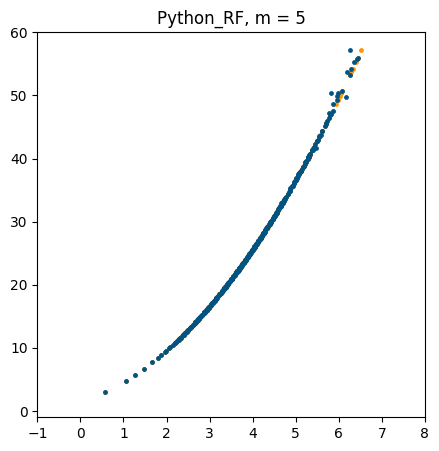

In [44]:
plt_bef_aft(df, MICE_RF_5, method = 'Python_RF', m = 5)

## MICE R

In [46]:
# miceR_RF_5 = pd.DataFrame(Imputers.impute(df_miss_MAR, imputer_name = 'R_mice_rf'), columns = df_miss_MAR.columns)

In [45]:
# plt_bef_aft(df, miceR_RF_5, 'R_RF', m = 5)

In [ ]:
distrs = ['norm', 'unif', 'lognorm1', 'lognorm2', 'gamma1', 'gamma2', 'norm_mix1', 'norm_mix2']
# scens = ['lr_quadr', 'logr_quadr', 'lr_inter', 'logr_inter']
scens = ['lr_quadr', 'lr_inter']

In [ ]:
# reload(gener_dt)

<module 'Data.gener_dt' from '/Users/ash/Desktop/MICE/Data/gener_dt.py'>

In [ ]:
def all(distr, scenar):
    df = gener_dt.gener(X_distr = distr, scenar = scenar)
    df_miss_MAR = amp(df)

    MICE_RF_5 = pd.DataFrame(np.array( Imputers.impute(df_miss_MAR, imputer_name = 'mice_rf') ).mean(axis = 0), columns = df_miss_MAR.columns)
    MICE_BR_5 = pd.DataFrame(np.array( Imputers.impute(df_miss_MAR, imputer_name = 'mice_br') ).mean(axis = 0), columns = df_miss_MAR.columns)
    df_merged = pd.concat([MICE_RF_5, MICE_BR_5], ignore_index = True)

    df['meth'] = 'full'
    MICE_RF_5['meth'] = 'rf'
    MICE_BR_5['meth'] = 'br'
    
    df_merged = pd.concat([df, MICE_RF_5, MICE_BR_5], ignore_index = True)
    return df_merged.sample(frac=1)

In [ ]:
reload(gener_dt)

<module 'Data.gener_dt' from '/Users/ash/Desktop/MICE/H-K article/../Data/gener_dt.py'>

2023-02-22 14:10:42,964 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:10:47,519 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:10:52,089 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:10:56,650 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:11:01,237 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:11:05,835 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:11:10,380 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?
2023-02-22 14:11:14,960 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?


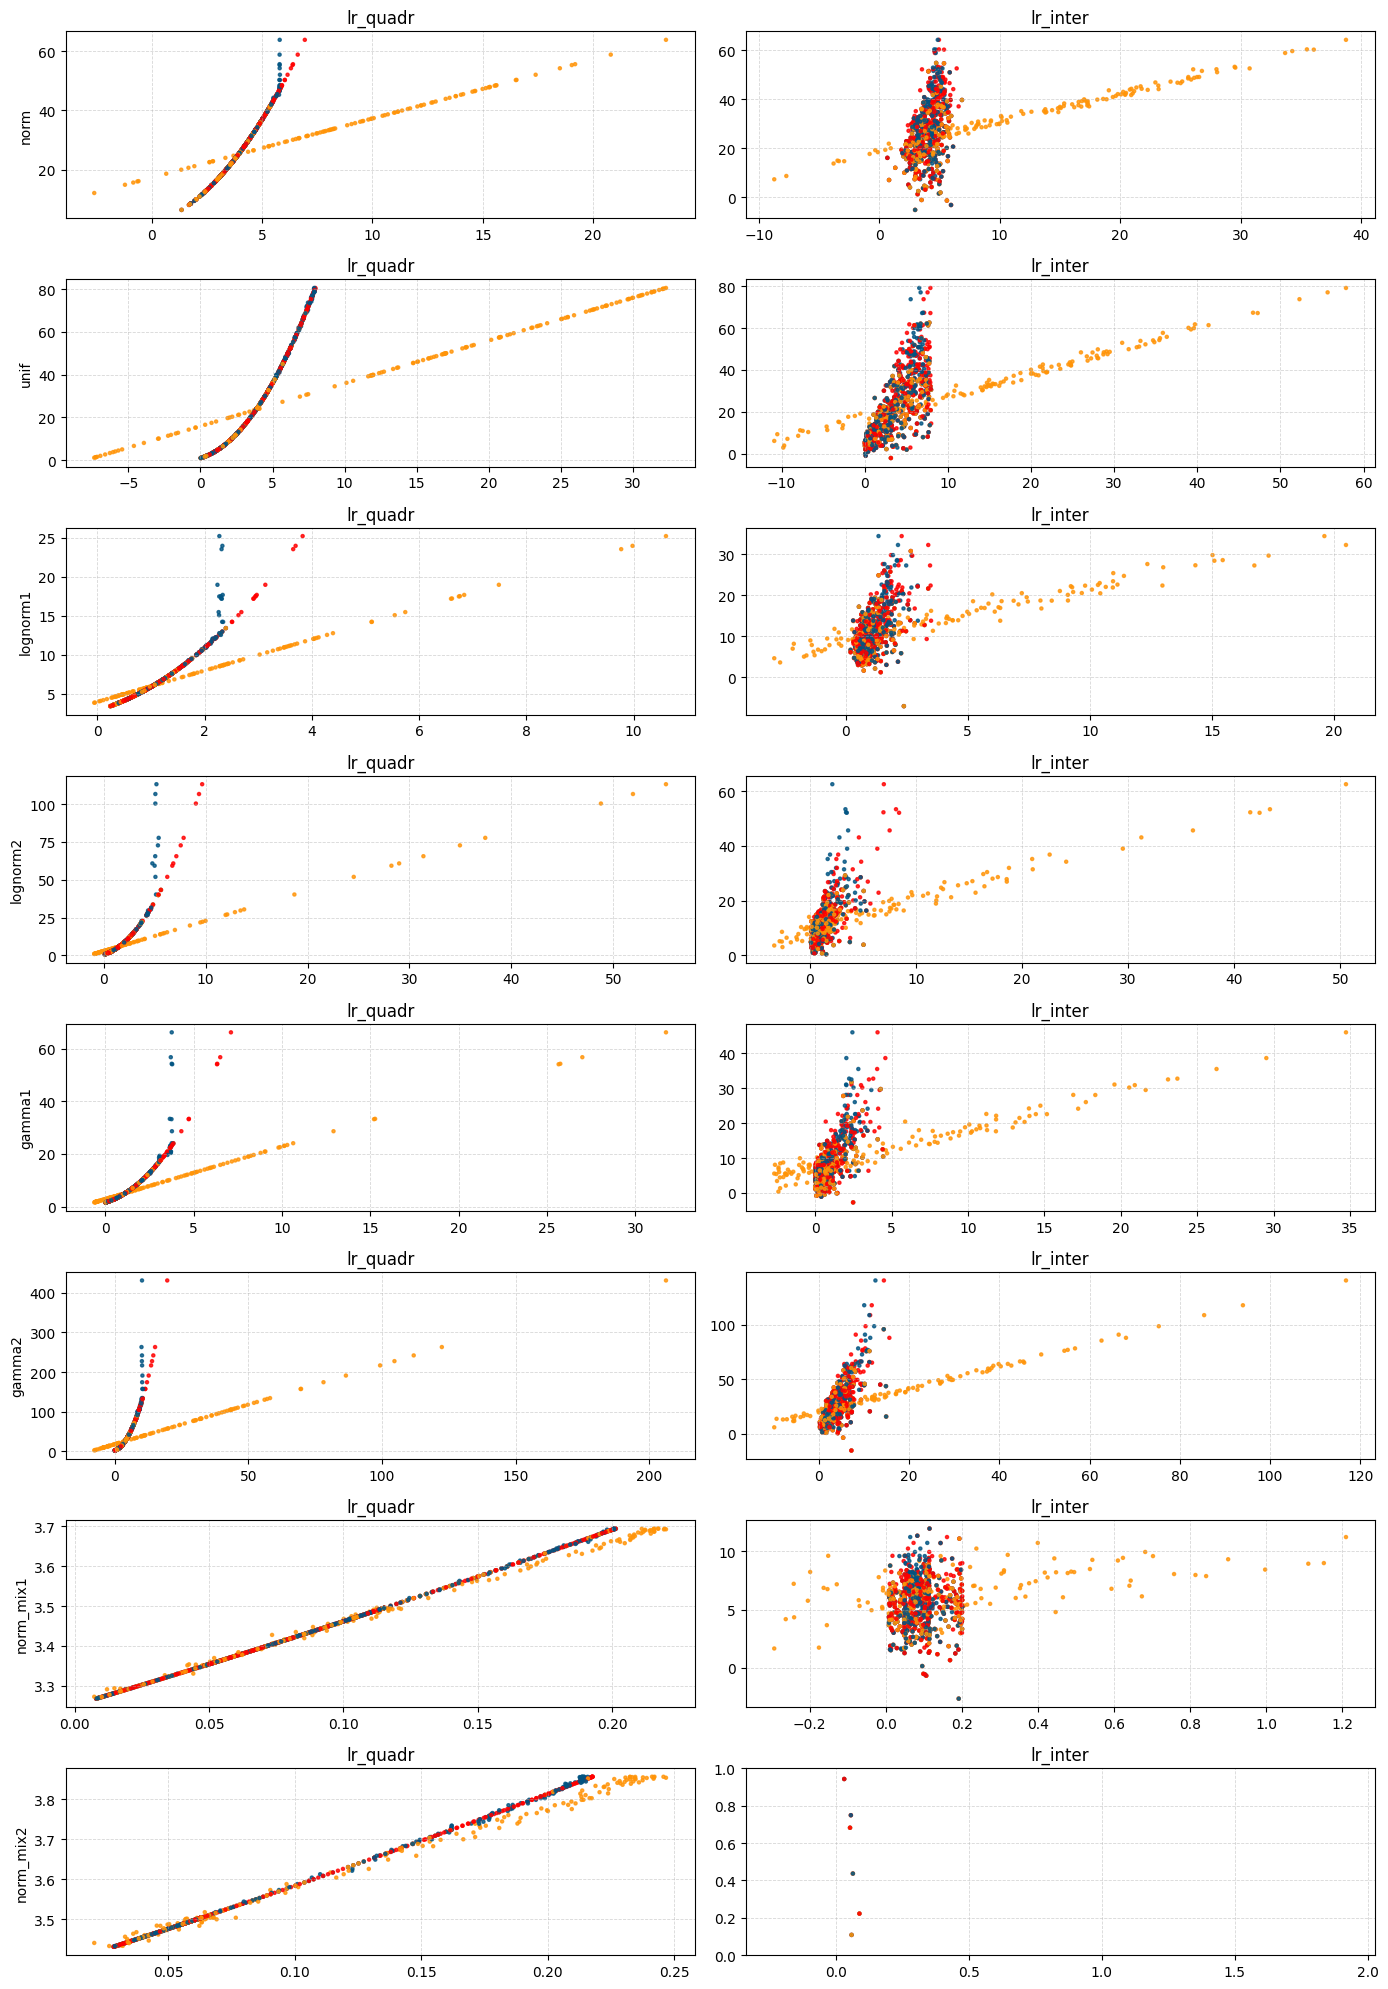

In [59]:
colors = {'full':'r', 'rf':'xkcd:deep sea blue', 'br':'xkcd:tangerine'}
i = 0
j = 0

fig, axs = plt.subplots( nrows = len(distrs), ncols = len(scens), figsize = (14, 20))#, sharex = True, sharey = True )
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
plt.gca().set_ylim(bottom = 0)
        
for di in distrs:
    for sc in scens:        
        
        df_fin = all(di, sc)
        
        axs[i, j].scatter( df_fin['X'], df_fin['Y'], s = 5, c = df_fin['meth'].map(colors), alpha = 0.8 )
        axs[i, j].set_title(sc)
        axs[i, j].grid(alpha = 0.5, linestyle = '--', linewidth = 0.6)
        axs[i, j].yaxis.get_data_interval()
        # axs[0, 0].set_ylabel("X2")
        j += 1

    j = 0
    axs[i, j].set_ylabel(di)
    i += 1

plt.tight_layout()
plt.show()

2023-02-15 17:56:27,700 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 17:56:33,658 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 17:56:40,811 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 17:56:46,529 [WARNING] Binary

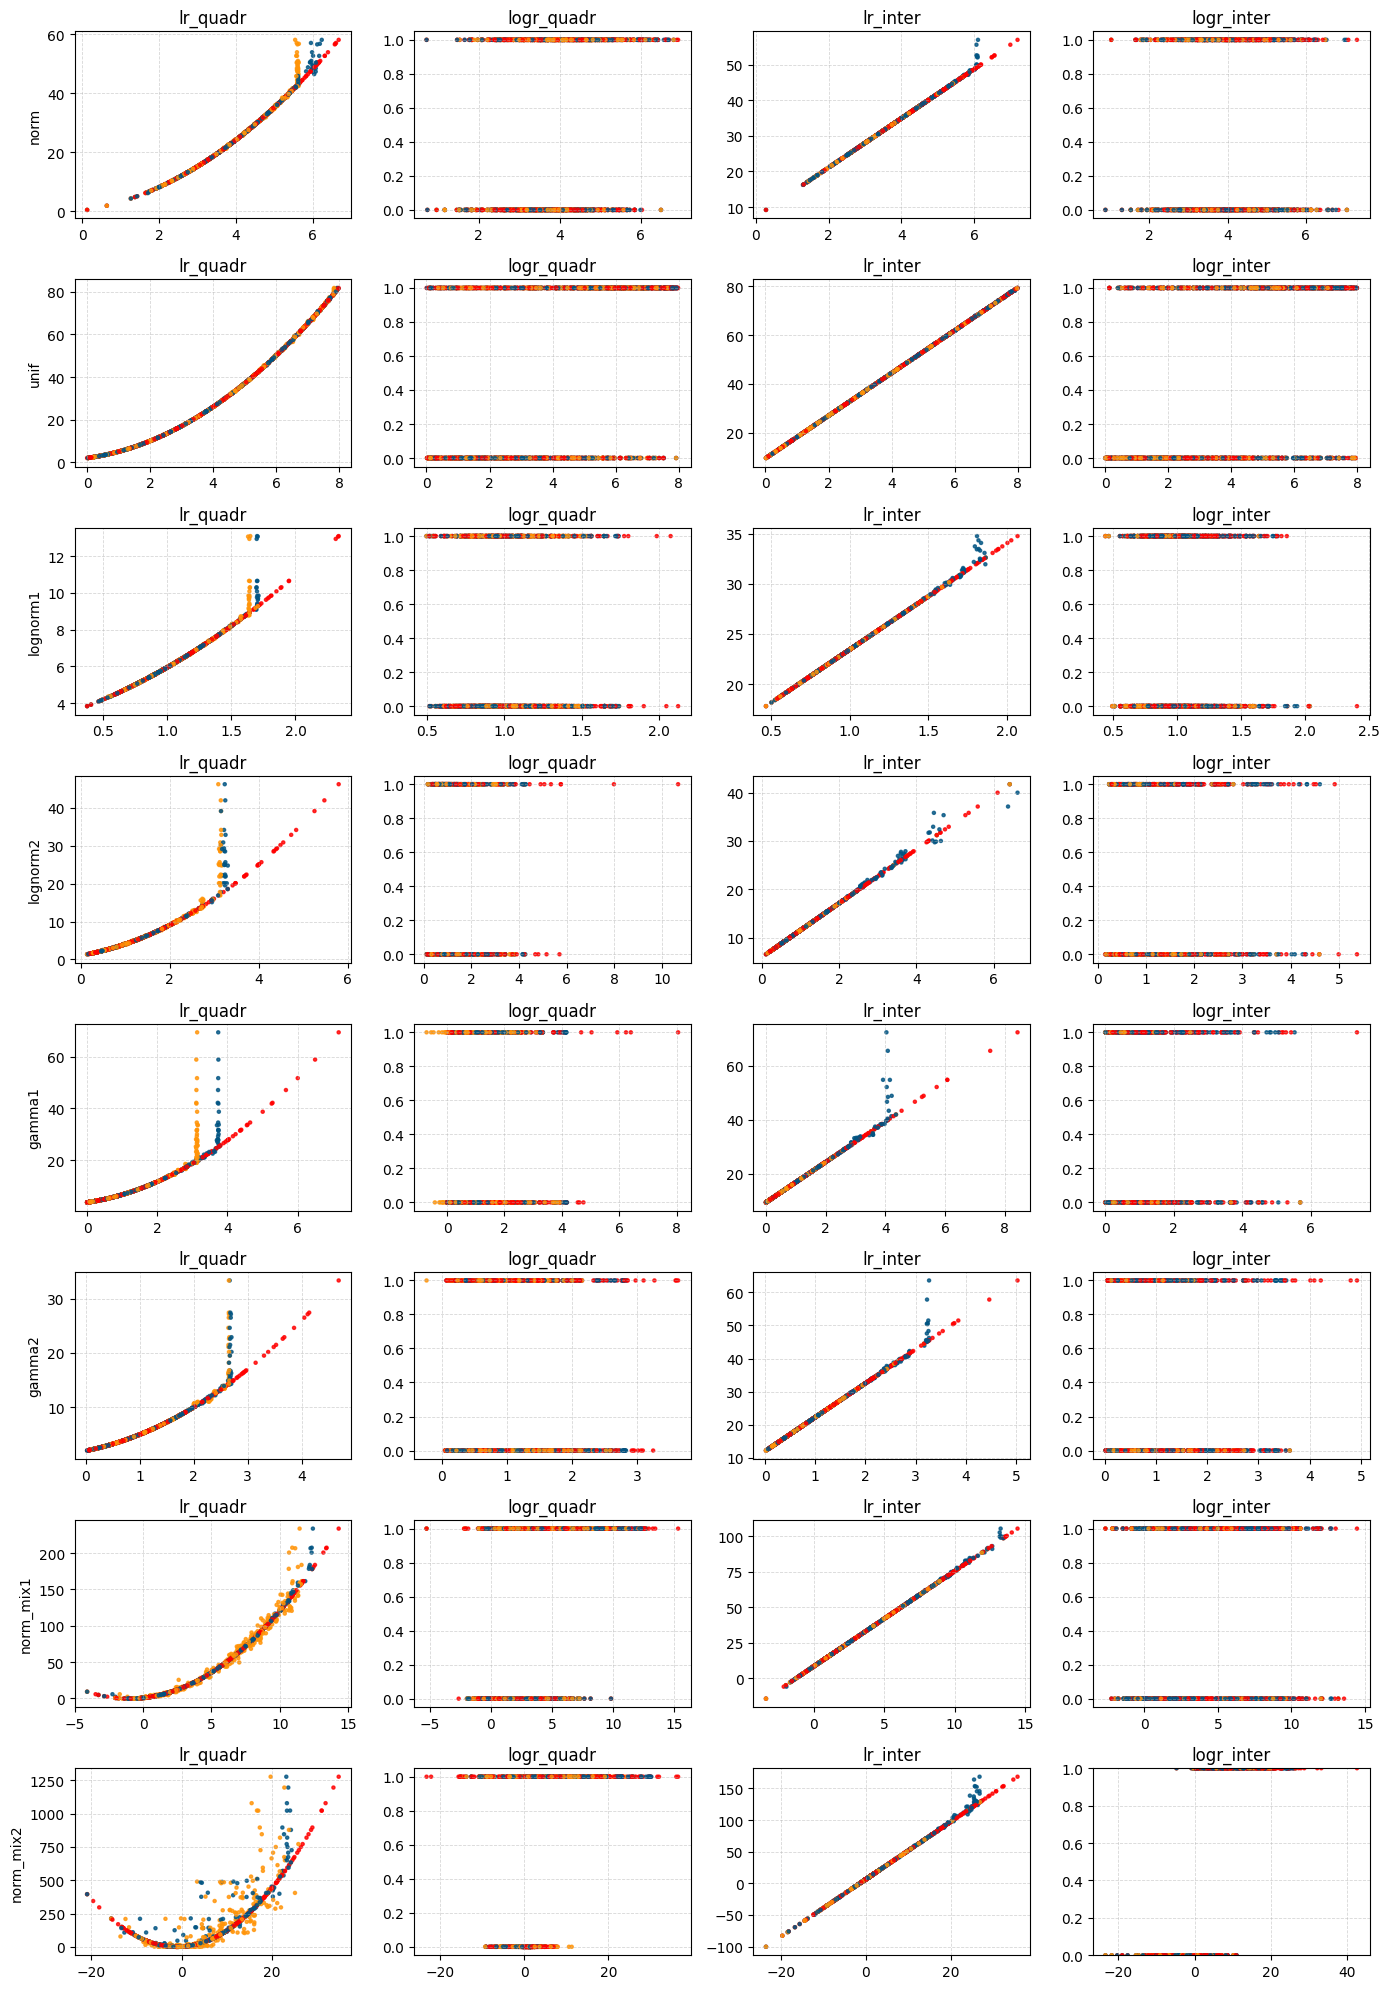

In [12]:
colors = {'full':'r', 'py_rf':'xkcd:deep sea blue', 'R_rf':'xkcd:tangerine'}
i = 0
j = 0

fig, axs = plt.subplots( nrows = len(distrs), ncols = len(scens), figsize = (14, 20))#, sharex = True, sharey = True )
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
plt.gca().set_ylim(bottom = 0)
        
for di in distrs:
    for sc in scens:        
        
        df_fin = all(di, sc)
        
        axs[i, j].scatter( df_fin['X'], df_fin['Y'], s = 5, c = df_fin['meth'].map(colors), alpha = 0.8 )
        axs[i, j].set_title(sc)
        axs[i, j].grid(alpha = 0.5, linestyle = '--', linewidth = 0.6)
        axs[i, j].yaxis.get_data_interval()
        # axs[0, 0].set_ylabel("X2")
        j += 1

    j = 0
    axs[i, j].set_ylabel(di)
    i += 1

plt.tight_layout()
plt.show()

In [99]:
def all(distr, scenar):
    df = gener_dt.gener(X_distr = distr, n = 1000, scenar = scenar)
    df_miss_MAR = amp(df)

    MICE_RF_5 = pd.DataFrame(np.array( Imputers.impute(df_miss_MAR, imputer_name = 'mice_rf') ).mean(axis = 0), columns = df_miss_MAR.columns)
    MICE_BR_5 = pd.DataFrame(np.array( Imputers.impute(df_miss_MAR, imputer_name = 'mice_br') ).mean(axis = 0), columns = df_miss_MAR.columns)
    df_merged = pd.concat([MICE_RF_5, MICE_BR_5], ignore_index = True)

    df['meth'] = 'full'
    MICE_RF_5['meth'] = 'py_rf'
    MICE_BR_5['meth'] = 'py_br'
    df_merged = pd.concat([df.sample(frac=1), MICE_RF_5.sample(frac=1), MICE_BR_5.sample(frac=1)], ignore_index = True)
    return df_merged

2023-02-15 15:09:38,384 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 15:09:42,851 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 15:09:47,263 [WARNING] Binary variables (at indices [2]) are indicated to be used in amputation (they are weighted and will be used to calculate the weighted sum score under MAR, MNAR, or MAR+MNAR). This can result in a subset with candidates that all have the same (or almost the same) weighted sum scores. 
2023-02-15 15:09:51,593 [WARNING] Binary

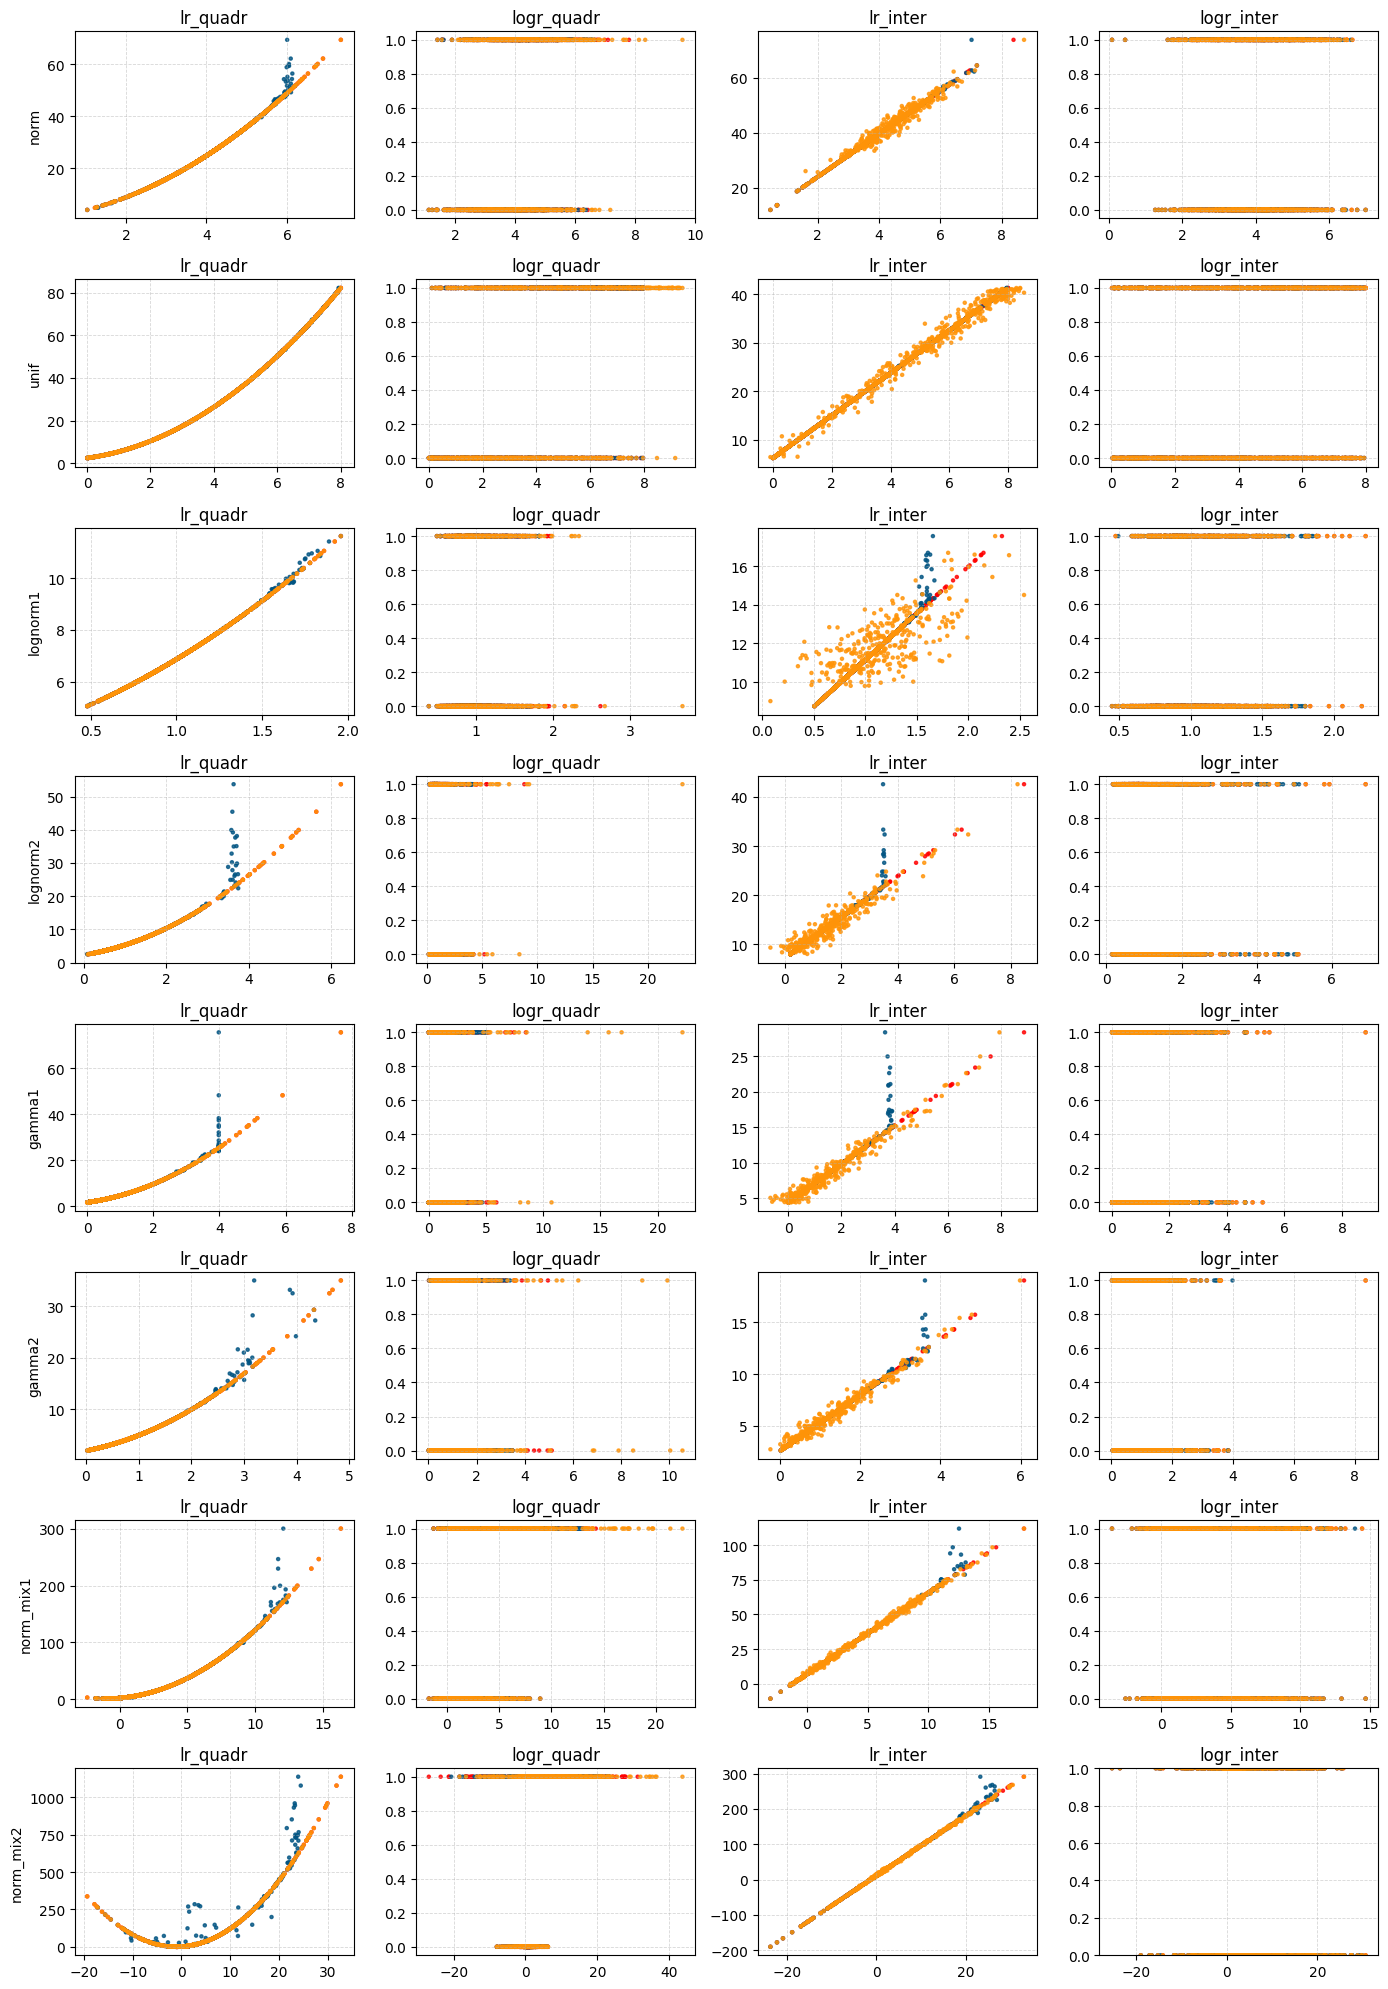

In [100]:
colors = {'full':'r', 'py_rf':'xkcd:deep sea blue', 'py_br':'xkcd:tangerine'}
i = 0
j = 0

fig, axs = plt.subplots( nrows = len(distrs), ncols = len(scens), figsize = (14, 20))#, sharex = True, sharey = True )
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
plt.gca().set_ylim(bottom = 0)
        
for di in distrs:
    for sc in scens:        
        
        df_fin = all(di, sc)
        
        axs[i, j].scatter( df_fin['X'], df_fin['Y'], s = 5, c = df_fin['meth'].map(colors), alpha = 0.8 )
        axs[i, j].set_title(sc)
        axs[i, j].grid(alpha = 0.5, linestyle = '--', linewidth = 0.6)
        axs[i, j].yaxis.get_data_interval()
        # axs[0, 0].set_ylabel("X2")
        j += 1

    j = 0
    axs[i, j].set_ylabel(di)
    i += 1

plt.tight_layout()
plt.show()  